## **abT and T.act gene clusters**

### 0. Preparing packages and files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Here I am loading a csv file with the genes that have been filtered in a previous step. 

In [2]:
filtered_genes = pd.read_csv("gene_clusters_for_GO.csv")

In [3]:
filtered_genes.head()

,Unnamed: 0,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,...,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM,Cluster
0,0610007P14Rik,-0.532894,0.416132,0.464170,0.233545,0.589881,0.814989,-2.433693,-1.042701,-1.020798,...,0.381103,-0.467569,-1.162795,-1.277198,0.163418,0.397041,1.254970,0.105091,0.359435,4
1,0610009B22Rik,0.822623,1.427842,1.734718,0.385080,1.172709,1.520430,-0.658766,-0.895060,-0.518324,...,-0.594860,-0.980738,-0.638713,-0.807749,-0.638012,1.251433,1.275182,0.855159,1.173505,4
2,0610009O20Rik,1.418314,0.331641,1.283357,0.182180,0.111572,1.086558,-0.713267,-1.190163,-0.854242,...,-1.835612,-0.177767,-0.714778,-0.400902,-0.201551,1.680819,1.345800,1.283784,2.231347,3
3,0610010F05Rik,1.099021,2.896547,1.076246,0.704736,1.738721,1.372051,-0.384310,-0.616206,-0.872409,...,-0.184474,-0.726078,-1.091932,-0.849982,-0.433531,-0.114739,1.348479,0.542396,1.384638,4
4,0610010K14Rik,-0.785941,-0.334382,1.542094,1.078273,1.706792,1.543335,-2.273527,0.570376,0.427042,...,-0.098225,-1.639747,-1.002484,-1.138302,-1.338454,-0.724199,0.512724,-0.594804,-0.457518,4


In [4]:
filtered_genes["Cluster"].unique()

array([4, 3, 1, 2, 0])

In [5]:
filtered_genes.max()

Unnamed: 0                  l7Rn6
preT.DN1.Th              5.128006
preT.DN2a.Th             5.120662
preT.DN2b.Th              4.70031
preT.DN3.Th              5.259418
T.DN4.Th                 3.642666
T.ISP.Th                 3.870797
T.DP.Th                  5.290488
T.4.Th                   5.279249
T.8.Th                   4.403183
T.4.Nve.Sp               3.955485
T.4.Nve.Fem.Sp           3.771439
T.4.Sp.aCD3+CD40.18hr    5.266999
T.8.Nve.Sp               3.634643
Treg.4.25hi.Sp           5.099163
Treg.4.FP3+.Nrplo.Co     5.291439
T8.TN.P14.Sp             3.949755
T8.TE.LCMV.d7.Sp         5.126563
T8.MP.LCMV.d7.Sp         4.184439
T8.IEL.LCMV.d7.Gut       5.288823
T8.Tcm.LCMV.d180.Sp      4.351576
T8.Tem.LCMV.d180.Sp       4.76637
NKT.Sp                   4.561144
NKT.Sp.LPS.3hr           5.284431
NKT.Sp.LPS.18hr          5.217925
NKT.Sp.LPS.3d            5.289658
LTHSC.34-.BM             5.274383
LTHSC.34+.BM             5.135771
STHSC.150-.BM             4.03229
MPP4.135+.BM  

In [6]:
print(filtered_genes.columns)

Index(['Unnamed: 0', 'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th',
       'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th', 'T.4.Th', 'T.8.Th',
       'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.8.Nve.Sp',
       'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'T8.TN.P14.Sp',
       'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp', 'T8.IEL.LCMV.d7.Gut',
       'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp',
       'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d', 'LTHSC.34-.BM',
       'LTHSC.34+.BM', 'STHSC.150-.BM', 'MPP4.135+.BM', 'Cluster'],
      dtype='object')


In [7]:
abT_Tact_cols = [
    'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th', 'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th',
    'T.4.Th', 'T.8.Th', 'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp', 'T.4.Sp.aCD3+CD40.18hr', 'T.8.Nve.Sp',
    'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co', 'T8.TN.P14.Sp', 'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',
    'T8.IEL.LCMV.d7.Gut', 'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp', 'NKT.Sp', 'NKT.Sp.LPS.3hr', 'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d'
]

abT_Tact_df = filtered_genes[['Unnamed: 0'] + abT_Tact_cols + ['Cluster']].copy()
abT_Tact_df.rename(columns={'Unnamed: 0': 'Gene'}, inplace=True)

### 1. Defining abT and T.act gene clusters

<div align="justify">
This part of the notebook involves the definition of specific gene clusters whose expression is more tightly correlated with either abT or T.act cells. To do that, we will be using the 5 pre-defined clusters from the csv with the filtered genes. After calculating the mean expression of the clusters in each cell type, we will be able to compare the clusters to one another. 
</div>


Here I am calculating the mean expression in the different cell types for each cluster.

In [8]:
cluster_means = (
    abT_Tact_df
    .groupby("Cluster")[abT_Tact_cols]
    .mean()
)

In [9]:
cluster_means

,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,T.4.Nve.Sp,...,T8.TN.P14.Sp,T8.TE.LCMV.d7.Sp,T8.MP.LCMV.d7.Sp,T8.IEL.LCMV.d7.Gut,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.218697,-0.183939,-0.048063,0.144162,0.039957,0.153591,2.237363,0.975603,0.379905,0.354335,...,0.076682,-0.560480,-0.514271,-0.468907,-0.404686,-0.369377,-0.020761,-0.132137,-0.110240,-0.222425
1,-0.647859,-0.783833,-0.774623,-0.788878,-0.860299,-0.838194,0.524901,0.457305,0.392940,1.050584,...,0.870054,0.027342,0.158344,-0.006892,0.573649,0.569904,0.372280,-0.021933,-0.078789,0.155349
2,-0.503712,-0.510296,-0.521331,-0.502333,-0.436895,-0.427662,-0.347064,-0.277662,-0.264300,-0.204394,...,-0.100411,0.896799,0.720356,0.875392,0.322058,0.424789,0.393790,0.884855,0.500874,0.500995
3,0.764615,0.502550,0.131782,-0.023144,-0.152665,-0.218312,-0.272954,-0.324414,-0.425682,-0.364188,...,-0.325844,-0.523696,-0.465948,-0.558392,-0.320364,-0.359816,-0.312451,-0.430069,-0.254788,-0.298790
4,0.353592,0.819279,1.032661,1.371374,1.773185,1.768721,-0.404086,-0.389149,-0.230008,-0.549842,...,-0.491705,-0.240178,-0.367082,-0.360532,-0.479381,-0.563344,-0.574380,-0.403734,-0.093413,-0.530600


In [10]:
abT_cells = [
    'preT.DN1.Th', 'preT.DN2a.Th', 'preT.DN2b.Th', 'preT.DN3.Th',
    'T.DN4.Th', 'T.ISP.Th', 'T.DP.Th',  # thymic developmental stages
    'T.4.Th', 'T.8.Th',                 # mature CD4+ and CD8+ T cells in thymus
    'T.4.Nve.Sp', 'T.4.Nve.Fem.Sp',     # naive CD4+ T cells in spleen
    'T.8.Nve.Sp',                       # naive CD8+ T cells in spleen
    'T8.TN.P14.Sp',                     # naive P14-specific CD8+ T cells
    'T8.Tcm.LCMV.d180.Sp', 'T8.Tem.LCMV.d180.Sp'  # central/memory CD8+ T
]

Tact_cells = [
    'T.4.Sp.aCD3+CD40.18hr',           # stimulated CD4+ T cells
    'Treg.4.25hi.Sp', 'Treg.4.FP3+.Nrplo.Co',  # regulatory T cells
    'T8.TE.LCMV.d7.Sp', 'T8.MP.LCMV.d7.Sp',    # effector/memory CD8+ T
    'T8.IEL.LCMV.d7.Gut',                     # intraepithelial lymphocytes
    'NKT.Sp', 'NKT.Sp.LPS.3hr',
    'NKT.Sp.LPS.18hr', 'NKT.Sp.LPS.3d'        # NKT cells under LPS stimulation
]

In [11]:
abT_cluster_means = cluster_means[abT_cells].copy()
Tact_cluster_means = cluster_means[Tact_cells].copy()

Now we will calculate the difference in mean expression between T.act and abT cells of each cluster.

In [12]:
diff = abT_cluster_means.mean(axis=1) - Tact_cluster_means.mean(axis=1)
cluster_means["abT_vs_Tact_diff"] = diff
print(diff.describe())

count    5.000000
mean     0.083056
std      0.535610
min     -0.812006
25%      0.015049
50%      0.257845
75%      0.461288
max      0.493105
dtype: float64


Now we can look at the values for each cluster below. When it comes to abT cells, cluster 0 and cluster 5 have moderate values of around 0.5. Tact cells on the other side, seem to be connected to a single gene cluster (cluster 2) which is highly skewed and shows a value of -0.81.

In [13]:
cluster_means["abT_vs_Tact_diff"]

Cluster
0    0.461288
1    0.015049
2   -0.812006
3    0.257845
4    0.493105
Name: abT_vs_Tact_diff, dtype: float64

Based on those values, we can assign those clusters to our cell lineages.

In [14]:
# Define thresholds for clusters that are more specific to one lineage
abT_like_clusters = cluster_means[diff > 0.4].index
Tact_like_clusters = cluster_means[diff < -0.4].index

print("abT-enriched clusters:", abT_like_clusters.tolist())
print("T.act-enriched clusters:", Tact_like_clusters.tolist())

abT_genes = filtered_genes.loc[filtered_genes["Cluster"].isin(abT_like_clusters), "Unnamed: 0"].tolist()
Tact_genes = filtered_genes.loc[filtered_genes["Cluster"].isin(Tact_like_clusters), "Unnamed: 0"].tolist()


abT-enriched clusters: [0, 4]
T.act-enriched clusters: [2]


### 2. Gene Ontology Enrichment

Gene ontology enrichment has to do with a genome-wide analysis of gene functions (Ashburner et al., 2000). It basically works like a dictionary, containing descriptions of gene functions/roles with each gene having a distinct GO identifier. 

We can use this to look into the role of the gene clusters we have attributed to either abT or T.act cells.

In [15]:
print(abT_genes[:20])

['0610007P14Rik', '0610009B22Rik', '0610010F05Rik', '0610010K14Rik', '0610012G03Rik', '1110004E09Rik', '1110004F10Rik', '1110038B12Rik', '1110059E24Rik', '1300002E11Rik', '1500009L16Rik', '1600002H07Rik', '1700017B05Rik', '1700037H04Rik', '1810022K09Rik', '1810026J23Rik', '2010107E04Rik', '2310022A10Rik', '2310061I04Rik', '2610002M06Rik']


In [16]:
from gprofiler import GProfiler

# Initialize g:Profiler
gp = GProfiler(return_dataframe=True)

# Extract gene names by cluster and convert index to list of strings
abT_genes = filtered_genes[filtered_genes["Cluster"].isin(abT_like_clusters)].index.astype(str).tolist()
Tact_genes = filtered_genes[filtered_genes["Cluster"].isin(Tact_like_clusters)].index.astype(str).tolist()

# Print counts to verify
print("abT genes:", len(abT_genes))
print("Tact genes:", len(Tact_genes))

# Run GO enrichment (organism = mouse)
go_abT = gp.profile(organism='mmusculus', query=abT_genes)
go_Tact = gp.profile(organism='mmusculus', query=Tact_genes)

# Optional: View top results
print(go_abT.head())
print(go_Tact.head())

abT genes: 3210
Tact genes: 1885
Empty DataFrame
Columns: [source, native, name, p_value, significant, description, term_size, query_size, intersection_size, effective_domain_size, precision, recall, query, parents]
Index: []
Empty DataFrame
Columns: [source, native, name, p_value, significant, description, term_size, query_size, intersection_size, effective_domain_size, precision, recall, query, parents]
Index: []


In [17]:
# Try a small subset directly to test lookup
test_genes = abT_genes[:10]  # or any 10 from your list
gp.profile(organism='mmusculus', query=test_genes)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents


In [18]:
abT_Tact_df.head()

,Gene,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,...,T8.TE.LCMV.d7.Sp,T8.MP.LCMV.d7.Sp,T8.IEL.LCMV.d7.Gut,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,Cluster
0,0610007P14Rik,-0.532894,0.416132,0.464170,0.233545,0.589881,0.814989,-2.433693,-1.042701,-1.020798,...,1.197358,0.471947,1.310536,0.401049,0.381103,-0.467569,-1.162795,-1.277198,0.163418,4
1,0610009B22Rik,0.822623,1.427842,1.734718,0.385080,1.172709,1.520430,-0.658766,-0.895060,-0.518324,...,-0.078143,-0.337680,-0.817115,-0.521017,-0.594860,-0.980738,-0.638713,-0.807749,-0.638012,4
2,0610009O20Rik,1.418314,0.331641,1.283357,0.182180,0.111572,1.086558,-0.713267,-1.190163,-0.854242,...,-0.829447,-0.419639,-0.213650,-0.851788,-1.835612,-0.177767,-0.714778,-0.400902,-0.201551,3
3,0610010F05Rik,1.099021,2.896547,1.076246,0.704736,1.738721,1.372051,-0.384310,-0.616206,-0.872409,...,-0.172662,-0.331301,-0.785590,-0.816572,-0.184474,-0.726078,-1.091932,-0.849982,-0.433531,4
4,0610010K14Rik,-0.785941,-0.334382,1.542094,1.078273,1.706792,1.543335,-2.273527,0.570376,0.427042,...,1.514489,0.979075,0.638845,0.104401,-0.098225,-1.639747,-1.002484,-1.138302,-1.338454,4


Apparently, the IDs of the analyzed genes are not suitable for our purposes. Therefore, the following code aims to convert them to proper IDs to which a function can be assigned in a later step. 

In [19]:
abT_filtered = abT_Tact_df[abT_Tact_df["Cluster"].isin(abT_like_clusters)]

gene_names_abT = abT_filtered["Gene"].tolist()

mapped_abT = gp.convert(organism="mmusculus", query=gene_names_abT)

In [20]:
print(mapped_abT.columns)
print(mapped_abT.head())

Index(['incoming', 'converted', 'n_incoming', 'n_converted', 'name',
       'description', 'namespaces', 'query'],
      dtype='object')
        incoming           converted  n_incoming  n_converted           name  \
0  0610007P14Rik                None           1            1           None   
1  0610009B22Rik                None           2            1           None   
2  0610010F05Rik                None           3            1           None   
3  0610010K14Rik  ENSMUSG00000020831           4            1  0610010K14Rik   
4  0610012G03Rik                None           5            1           None   

                                         description  \
0                                               None   
1                                               None   
2                                               None   
3  RIKEN cDNA 0610010K14 gene [Source:MGI Symbol;...   
4                                               None   

                           namespaces    quer

The first couple of rows contain multiple genes whose Riken ID could not be converted properly. Here is the total number of those genes:

In [21]:
print("# of unmatched gene names:", sum(mapped_abT["converted"]=="None"))
print("# of matched gene names:", sum(mapped_abT["converted"]!="None"))

# of unmatched gene names: 158
# of matched gene names: 3081


In [22]:
valid_abT_ids = mapped_abT[mapped_abT["converted"]!="None"]

In [23]:
valid_abT_ids.head()

,incoming,converted,n_incoming,n_converted,name,description,namespaces,query
3,0610010K14Rik,ENSMUSG00000020831,4,1,0610010K14Rik,RIKEN cDNA 0610010K14 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,UNIPROT_GN,WIKIGENE",query_1
6,1110004F10Rik,ENSMUSG00000030663,7,1,1110004F10Rik,RIKEN cDNA 1110004F10 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,UNIPROT_GN,WIKIGENE",query_1
7,1110038B12Rik,ENSMUSG00000092203,8,1,1110038B12Rik,RIKEN cDNA 1110038B12 gene [Source:MGI Symbol;...,MGI,query_1
8,1110059E24Rik,ENSMUSG00000035171,9,1,1110059E24Rik,RIKEN cDNA 1110059E24 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,UNIPROT_GN,WIKIGENE",query_1
9,1300002E11Rik,ENSMUSG00000097290,10,1,1300002E11Rik,RIKEN cDNA 1300002E11 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,WIKIGENE",query_1


In [24]:
Tact_filtered = abT_Tact_df[abT_Tact_df["Cluster"].isin(Tact_like_clusters)]

gene_names_Tact = Tact_filtered["Gene"].tolist()

mapped_Tact = gp.convert(organism="mmusculus", query=gene_names_Tact)

print(mapped_Tact.columns)
print(mapped_Tact.head())

print("# of unmatched gene names:", sum(mapped_Tact["converted"]=="None"))
print("# of matched gene names:", sum(mapped_Tact["converted"]!="None"))

valid_Tact_ids = mapped_Tact[mapped_Tact["converted"]!="None"]
valid_Tact_ids.head()

Index(['incoming', 'converted', 'n_incoming', 'n_converted', 'name',
       'description', 'namespaces', 'query'],
      dtype='object')
        incoming           converted  n_incoming  n_converted           name  \
0  1110008P14Rik                None           1            1           None   
1  1110037F02Rik                None           2            1           None   
2  1110038F14Rik  ENSMUSG00000063236           3            1  1110038F14Rik   
3  1500011B03Rik  ENSMUSG00000072694           4            1        Gm57857   
4  1600014C10Rik  ENSMUSG00000054676           5            1  1600014C10Rik   

                                         description  \
0                                               None   
1                                               None   
2  RIKEN cDNA 1110038F14 gene [Source:MGI Symbol;...   
3  predicted gene, 57857 [Source:MGI Symbol;Acc:M...   
4  RIKEN cDNA 1600014C10 gene [Source:MGI Symbol;...   

                           namespaces    quer

,incoming,converted,n_incoming,n_converted,name,description,namespaces,query
2,1110038F14Rik,ENSMUSG00000063236,3,1,1110038F14Rik,RIKEN cDNA 1110038F14 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,WIKIGENE",query_1
3,1500011B03Rik,ENSMUSG00000072694,4,1,Gm57857,"predicted gene, 57857 [Source:MGI Symbol;Acc:M...","ENTREZGENE,UNIPROT_GN,WIKIGENE",query_1
4,1600014C10Rik,ENSMUSG00000054676,5,1,1600014C10Rik,RIKEN cDNA 1600014C10 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,UNIPROT_GN,WIKIGENE",query_1
6,1700025G04Rik,ENSMUSG00000032666,7,1,1700025G04Rik,RIKEN cDNA 1700025G04 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,UNIPROT_GN,WIKIGENE",query_1
7,1700123O20Rik,ENSMUSG00000040822,8,1,1700123O20Rik,RIKEN cDNA 1700123O20 gene [Source:MGI Symbol;...,"ENTREZGENE,MGI,UNIPROT_GN,WIKIGENE",query_1


In [25]:
go_results_abT = gp.profile(organism="mmusculus", query=valid_abT_ids["converted"].tolist())
go_results_Tact = gp.profile(organism="mmusculus", query=valid_Tact_ids["converted"].tolist())

In [26]:
go_results_abT.head()

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:CC,GO:0005622,intracellular anatomical structure,6.479996e-309,True,"""A component of a cell contained within (but n...",17451,3000,2813,26207,0.937667,0.161194,query_1,[GO:0110165]
1,GO:CC,GO:0005654,nucleoplasm,3.754072e-281,True,"""That part of the nuclear content other than t...",3705,3000,1158,26207,0.386000,0.312551,query_1,"[GO:0031981, GO:0110165]"
2,TF,TF:M04662_1,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,1.551575e-280,True,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,12793,3044,2644,21700,0.868594,0.206676,query_1,[TF:M04662]
3,GO:CC,GO:0043229,intracellular organelle,2.715980e-261,True,"""Organized structure of distinctive morphology...",15833,3000,2627,26207,0.875667,0.165919,query_1,"[GO:0005622, GO:0043226]"
4,TF,TF:M00716,Factor: ZF5; motif: GSGCGCGR,8.548554e-256,True,Factor: ZF5; motif: GSGCGCGR,14864,3044,2820,21700,0.926413,0.189720,query_1,[TF:M00000]


In [27]:
# If needed, we can also remove limits on how wide the columns are by using the following code: 
# pd.set_option("display.max_colwidth", None)

pd.set_option("display.max_colwidth", 50)

abT_summary = go_results_abT[["name", "p_value", "description", "precision", "recall", "intersection_size"]].sort_values("p_value")
abT_summary.head(n=10)

,name,p_value,description,precision,recall,intersection_size
0,intracellular anatomical structure,6.479996e-309,"""A component of a cell contained within (but n...",0.937667,0.161194,2813
1,nucleoplasm,3.754072e-281,"""That part of the nuclear content other than t...",0.386000,0.312551,1158
2,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,1.551575e-280,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,0.868594,0.206676,2644
3,intracellular organelle,2.715980e-261,"""Organized structure of distinctive morphology...",0.875667,0.165919,2627
4,Factor: ZF5; motif: GSGCGCGR,8.548554e-256,Factor: ZF5; motif: GSGCGCGR,0.926413,0.189720,2820
5,organelle,2.480539e-251,"""Organized structure of distinctive morphology...",0.881000,0.163360,2643
6,intracellular membrane-bounded organelle,1.130825e-249,"""Organized structure of distinctive morphology...",0.827333,0.172050,2482
7,Factor: ZF5; motif: GSGCGCGR; match class: 1,1.525145e-245,Factor: ZF5; motif: GSGCGCGR; match class: 1,0.825558,0.208047,2513
8,membrane-bounded organelle,2.210978e-243,"""Organized structure of distinctive morphology...",0.839667,0.168834,2519
9,Factor: E2F-1; motif: GNGGGCGGGRMN,2.250241e-233,Factor: E2F-1; motif: GNGGGCGGGRMN,0.897503,0.191760,2732


In [28]:
keywords = ["immune", "cytokine", "T cell", "activation", "differentiation", "signaling", "MHC"]

def contains_keywords(df):
    return df[df["name"].str.contains('|'.join(keywords), case=False)]

In [29]:
immune_abT = contains_keywords(go_results_abT)
immune_Tact = contains_keywords(go_results_Tact)

In [30]:
abT_terms = set(immune_abT["name"])
Tact_terms = set(immune_Tact["name"])

unique_abT = abT_terms - Tact_terms
unique_Tact = Tact_terms - abT_terms


print("abT-specific terms:", unique_abT)
print("T.act-specific terms:", unique_Tact)

abT-specific terms: {'Activation of APC/C and APC/C:Cdc20 mediated degradation of mitotic proteins', 'positive regulation of B cell activation', 'Mitotic Telophase/Cytokinesis', 'immunoglobulin production involved in immunoglobulin-mediated immune response', 'AURKA Activation by TPX2', 'Signaling by Rho GTPases, Miro GTPases and RHOBTB3', 'negative regulation of intrinsic apoptotic signaling pathway', 'mitotic spindle checkpoint signaling', 'spindle assembly checkpoint signaling', 'B cell activation involved in immune response', 'TCF dependent signaling in response to WNT', 'DNA damage checkpoint signaling', 'mitotic G2 DNA damage checkpoint signaling', 'RUNX1 regulates transcription of genes involved in differentiation of HSCs', 'Activation of the pre-replicative complex', 'somatic recombination of immunoglobulin genes involved in immune response', 'DNA replication checkpoint signaling', 'somatic diversification of immune receptors', 'cytoskeleton-dependent cytokinesis', 'mitotic DNA 

C:\Users\boris\AppData\Local\Temp\ipykernel_18672\187181545.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


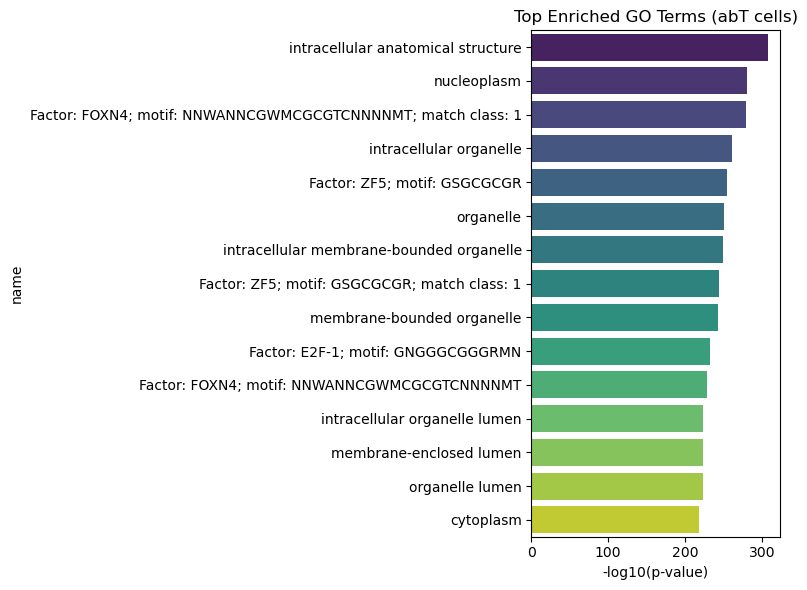

In [31]:
# Sort by p-value and take the top N results
go_results_abT["-log10(p_value)"] = -np.log10(go_results_abT["p_value"])
go_results_Tact["-log10(p_value)"] = -np.log10(go_results_Tact["p_value"])
top_n = 15
top_go = go_results_abT.sort_values("p_value").head(top_n)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_go,
    y="name",
    x="-log10(p_value)",
    palette="viridis"
)
plt.xlabel("-log10(p-value)")
plt.title("Top Enriched GO Terms (abT cells)")
plt.tight_layout()
plt.show()

C:\Users\boris\AppData\Local\Temp\ipykernel_18672\1084922302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


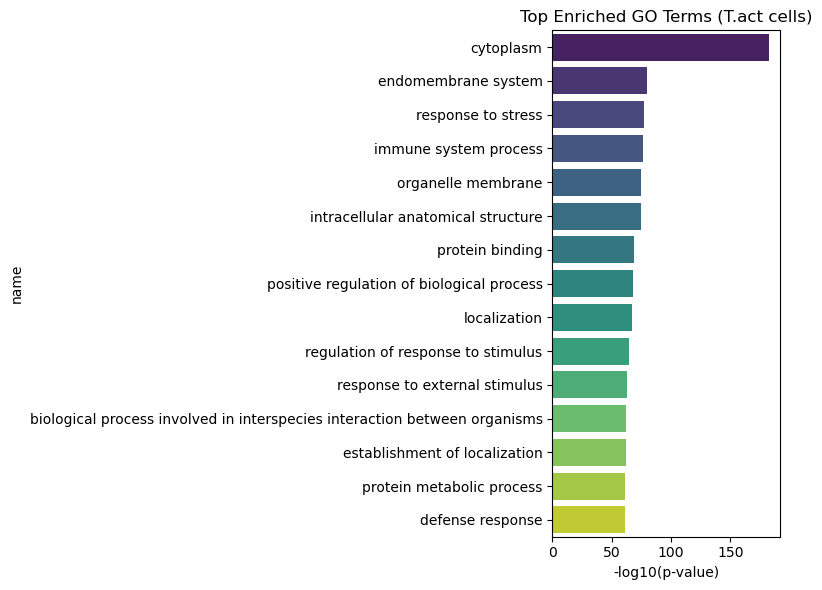

In [32]:
top_go = go_results_Tact.sort_values("p_value").head(top_n)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_go,
    y="name",
    x="-log10(p_value)",
    palette="viridis"
)
plt.xlabel("-log10(p-value)")
plt.title("Top Enriched GO Terms (T.act cells)")
plt.tight_layout()
plt.show()

In [33]:
# Keep only Biological Process terms
abT_go_filtered = go_results_abT[go_results_abT["source"] == "GO:BP"]

# Remove very broad terms
abT_go_filtered = abT_go_filtered[abT_go_filtered["term_size"] < 300]

# Keep only statistically strong hits
abT_go_filtered = abT_go_filtered[abT_go_filtered["p_value"] < 0.001]

# Prioritize the most informative terms
abT_go_filtered = abT_go_filtered.sort_values("precision", ascending=False).head(50)

In [34]:
Tact_go_filtered = go_results_Tact[go_results_Tact["source"] == "GO:BP"]

Tact_go_filtered = Tact_go_filtered[Tact_go_filtered["term_size"] < 300]

Tact_go_filtered = Tact_go_filtered[Tact_go_filtered["p_value"] < 0.001]

Tact_go_filtered = Tact_go_filtered.sort_values("precision", ascending=False).head(50)

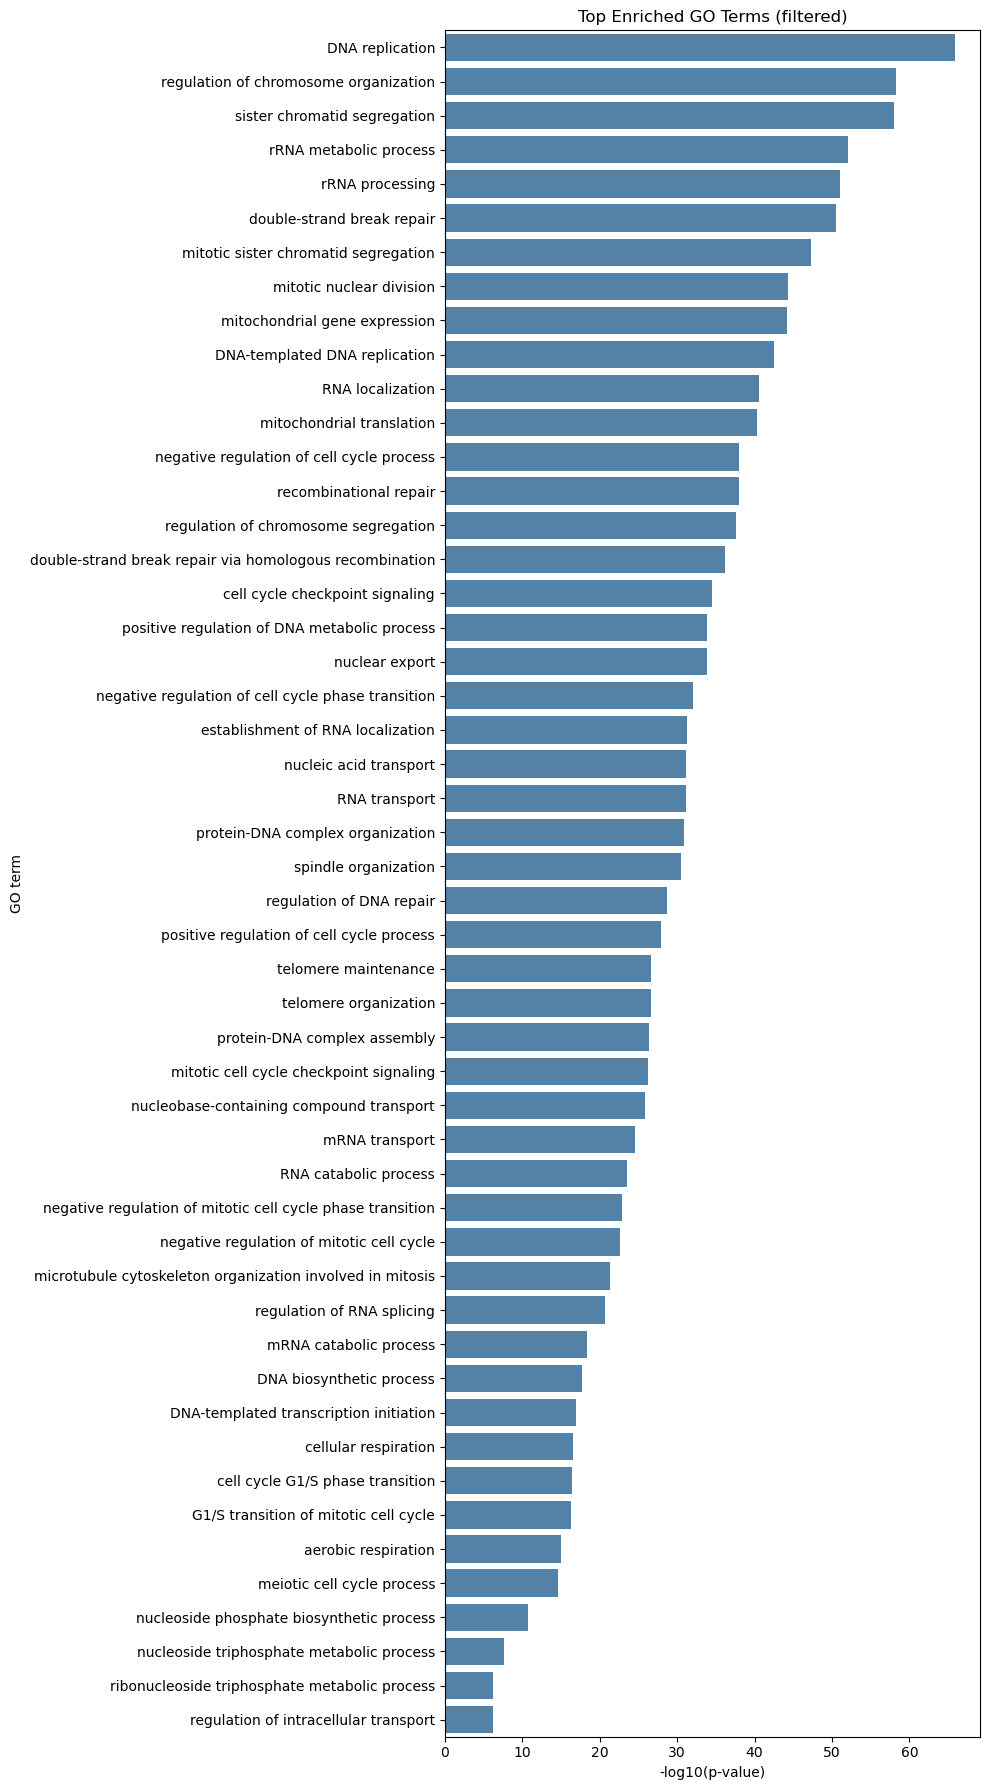

In [35]:
plt.figure(figsize=(10, 18))
sns.barplot(
    data=abT_go_filtered.sort_values("-log10(p_value)", ascending=False),
    y="name",
    x="-log10(p_value)",
    color="steelblue"
)
plt.xlabel("-log10(p-value)")
plt.ylabel("GO term")
plt.title("Top Enriched GO Terms (filtered)")
plt.tight_layout()
plt.show()

C:\Users\boris\AppData\Local\Temp\ipykernel_18672\3664318699.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


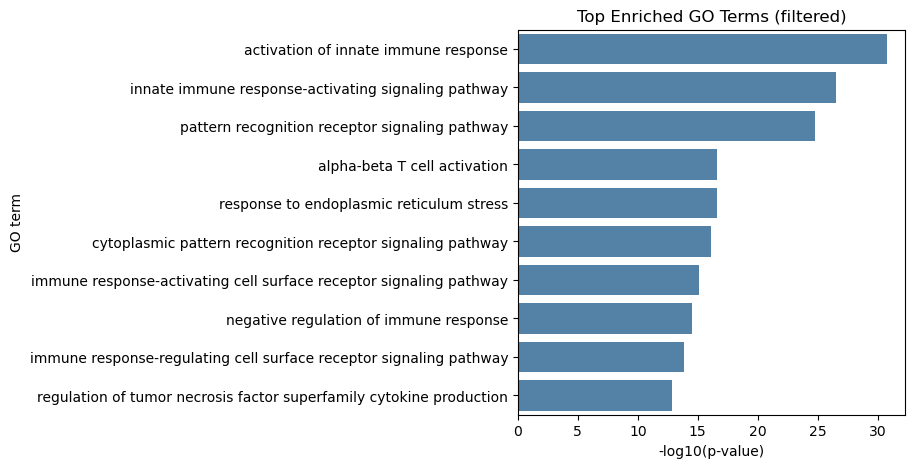

In [56]:
plt.figure(figsize=(5, 5))
sns.barplot(
    data=Tact_go_filtered.sort_values("-log10(p_value)", ascending=False).head(10),
    y="name",
    x="-log10(p_value)",
    color="steelblue"
)
plt.xlabel("-log10(p-value)")
plt.ylabel("GO term")
plt.title("Top Enriched GO Terms (filtered)")
plt.tight_layout()
plt.show()

In [100]:
# Define the shortened names
term_mapping = {
    "activation of innate immune response": "Innate immune activation",
    "innate immune response-activating signaling pathway": "Innate immune signaling",
    "cytoplasmic pattern recognition receptor signaling pathway": "Cytoplasmic pattern recognition",
    "alpha-beta T cell activation": "αβ T cell activation",
    "immune response-activating cell surface receptor signaling pathway": "Immune receptor activation",
    "immune response-regulating cell surface receptor signaling pathway": "Immune receptor regulation",
    "regulation of tumor necrosis factor superfamily cytokine production": "TNF cytokine regulation",
    "response to endoplasmic reticulum stress": "ER stress response",
    "pattern recognition receptor signaling pathway":"Pattern recognition signaling",
    "negative regulation of immune response": "Negative immune regulation"
}

# Apply to your GO DataFrame (assuming it's called go_df)
Tact_go_filtered['short_name'] = Tact_go_filtered['name'].map(term_mapping).fillna(go_df['name'])

C:\Users\boris\AppData\Local\Temp\ipykernel_18672\1934929927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


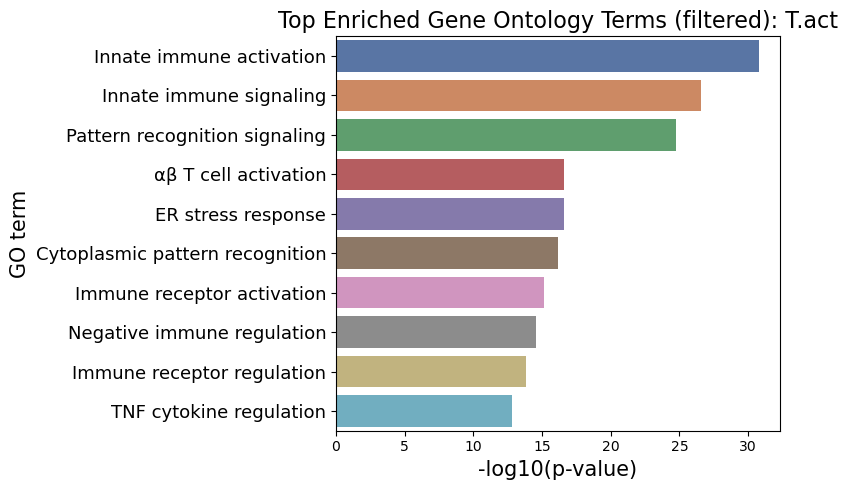

In [101]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=Tact_go_filtered.sort_values("-log10(p_value)", ascending=False).head(10),
    y="short_name",
    x="-log10(p_value)",
    palette="deep"
)
plt.xlabel("-log10(p-value)", fontsize=15)
plt.ylabel("GO term", fontsize=15)
plt.yticks(fontsize=13)
plt.title("Top Enriched Gene Ontology Terms (filtered): T.act", fontsize=16)
plt.tight_layout()
plt.show()

In [91]:
unique_abT_terms = set(abT_go_filtered['name']) - set(Tact_go_filtered['name'])
unique_Tact_terms = set(Tact_go_filtered['name']) - set(abT_go_filtered['name'])


In [38]:
go_results_abT.head()

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,-log10(p_value)
0,GO:CC,GO:0005622,intracellular anatomical structure,6.479996e-309,True,"""A component of a cell contained within (but n...",17451,3000,2813,26207,0.937667,0.161194,query_1,[GO:0110165],308.188425
1,GO:CC,GO:0005654,nucleoplasm,3.754072e-281,True,"""That part of the nuclear content other than t...",3705,3000,1158,26207,0.386000,0.312551,query_1,"[GO:0031981, GO:0110165]",280.425497
2,TF,TF:M04662_1,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,1.551575e-280,True,Factor: FOXN4; motif: NNWANNCGWMCGCGTCNNNNMT; ...,12793,3044,2644,21700,0.868594,0.206676,query_1,[TF:M04662],279.809227
3,GO:CC,GO:0043229,intracellular organelle,2.715980e-261,True,"""Organized structure of distinctive morphology...",15833,3000,2627,26207,0.875667,0.165919,query_1,"[GO:0005622, GO:0043226]",260.566073
4,TF,TF:M00716,Factor: ZF5; motif: GSGCGCGR,8.548554e-256,True,Factor: ZF5; motif: GSGCGCGR,14864,3044,2820,21700,0.926413,0.189720,query_1,[TF:M00000],255.068107


In [49]:
import networkx as nx

# Filter significant terms (you can adjust threshold)
go_results_filtered = Tact_go_filtered[Tact_go_filtered['significant'] == True].copy()

# Limit number of terms for clarity
go_results_filtered = go_results_filtered.sort_values('p_value').head(15)

# Compute -log10(p_value)
go_results_filtered['log_p'] = -np.log10(go_results_filtered['p_value'])

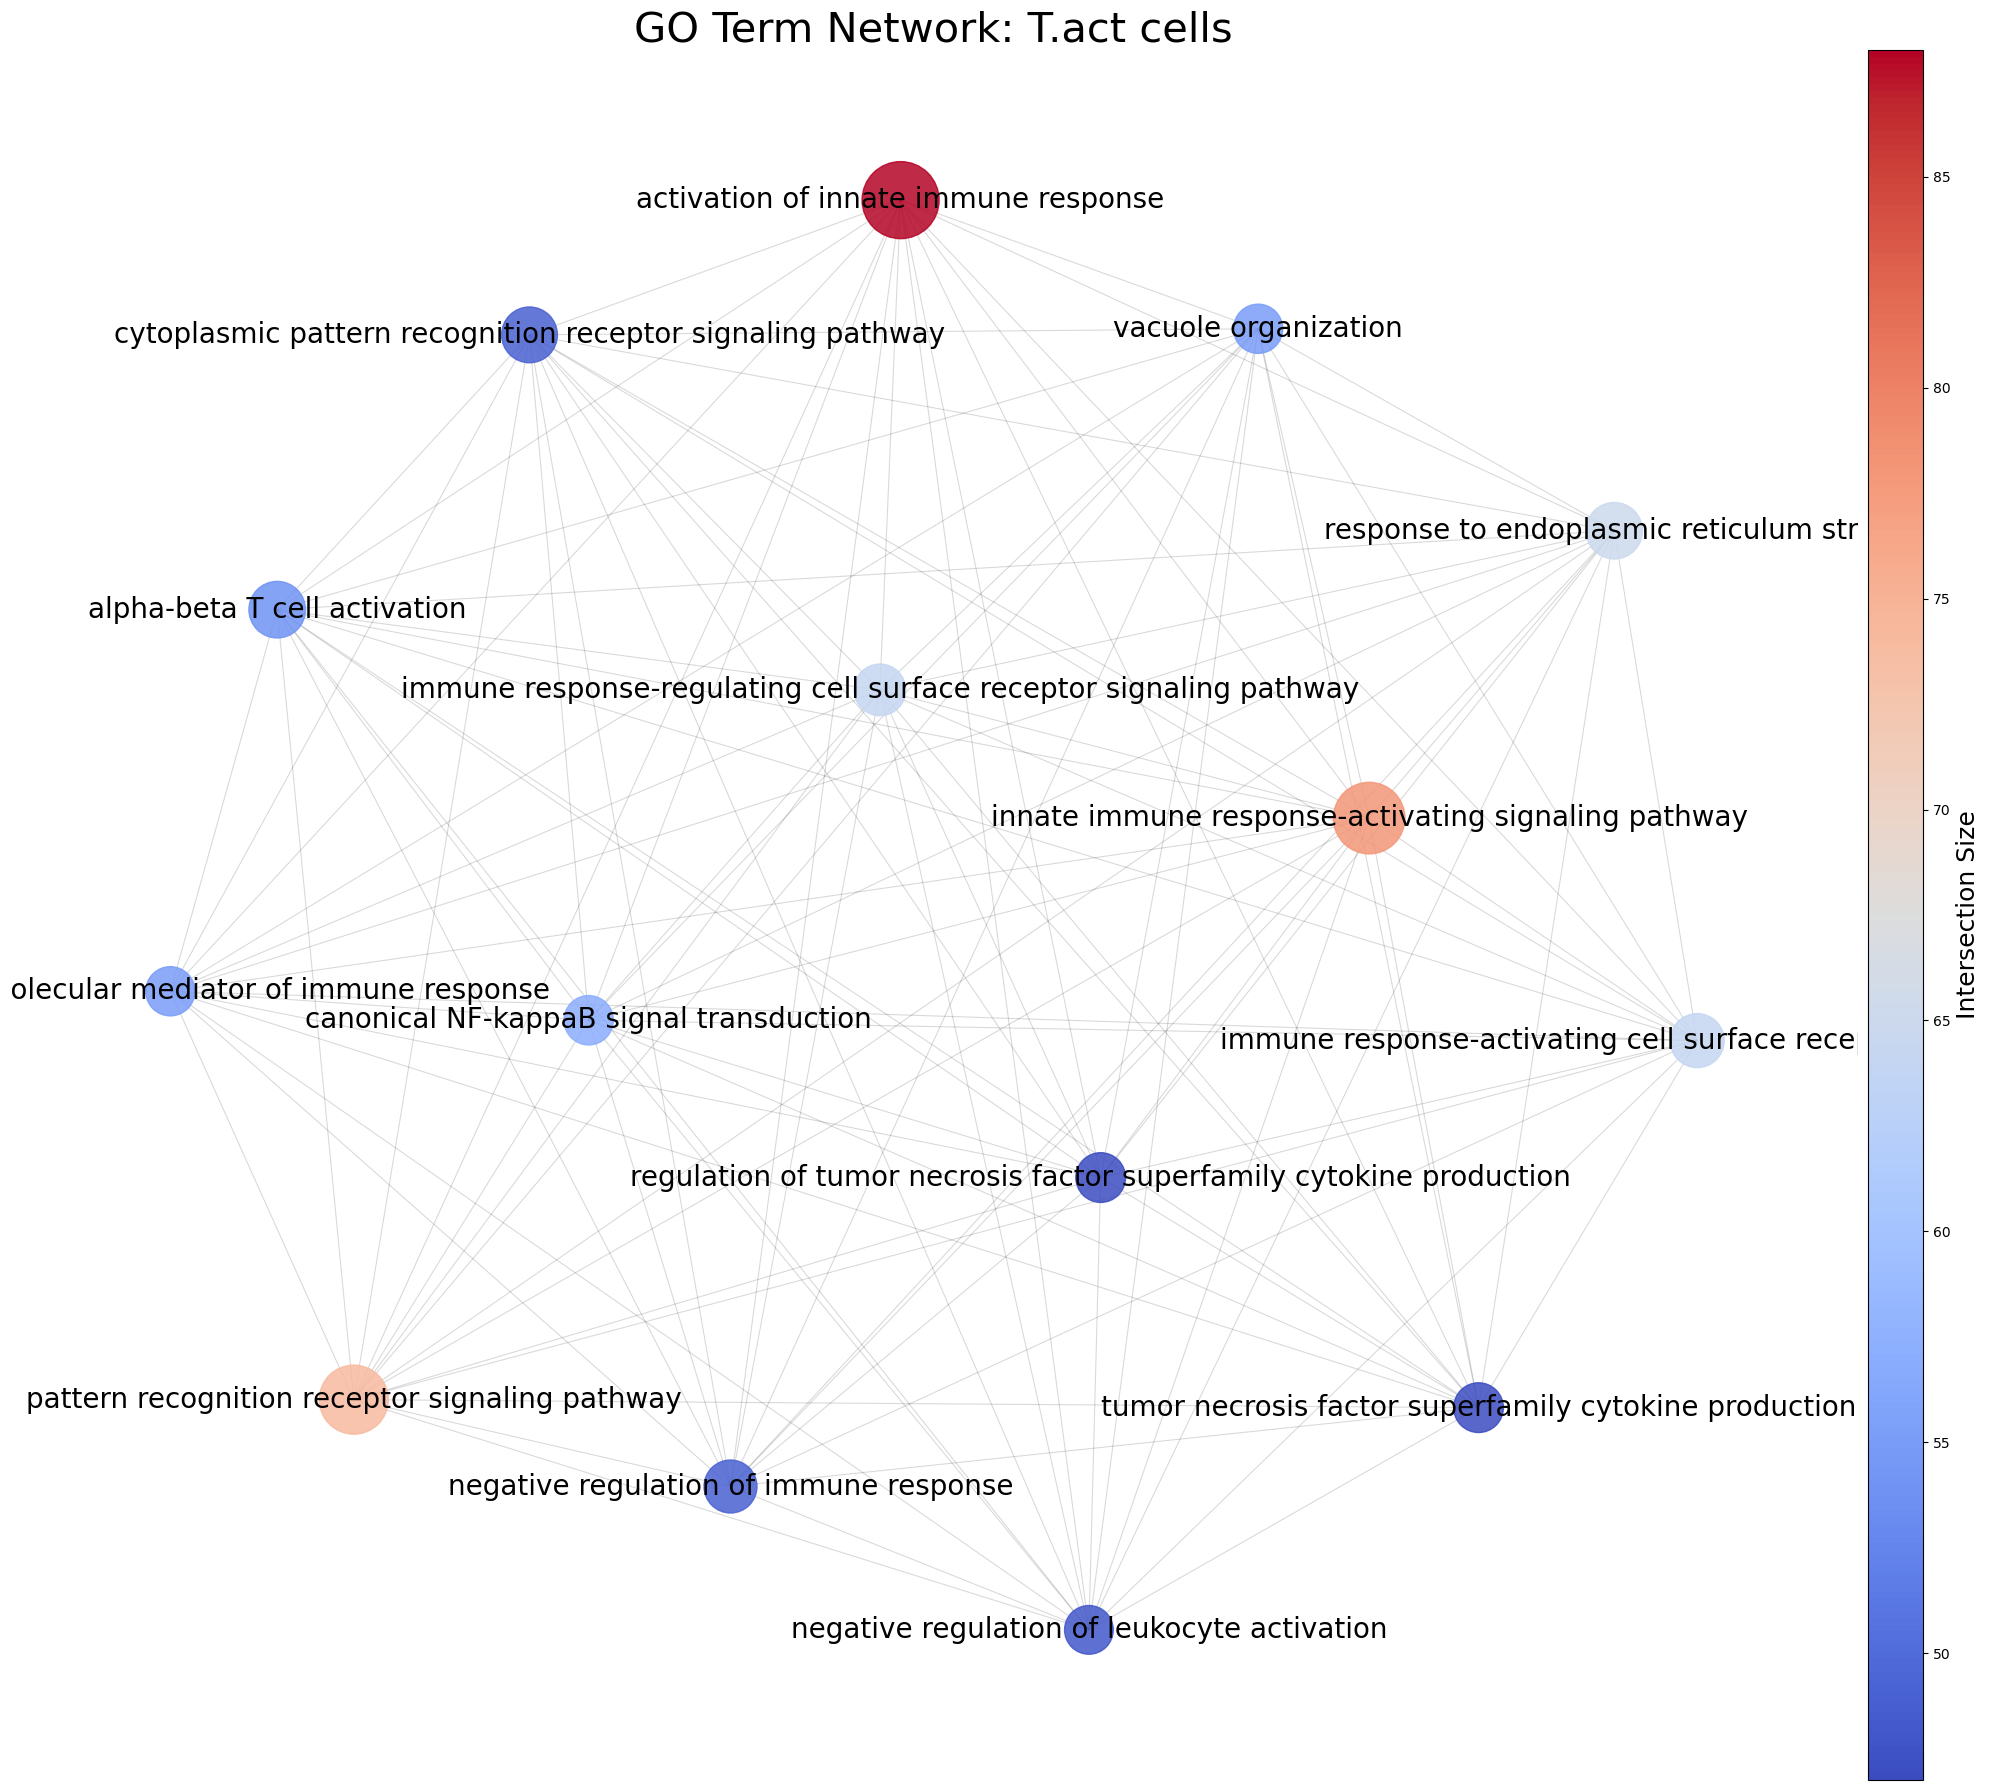

In [50]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create graph
G = nx.Graph()
for _, row in go_results_filtered.iterrows():
    G.add_node(row['name'],
               log_p=row['log_p'],
               size=row['intersection_size'])

# Add all-to-all edges (can be adjusted if needed)
terms = go_results_filtered['name'].tolist()
for i in range(len(terms)):
    for j in range(i + 1, len(terms)):
        G.add_edge(terms[i], terms[j])

# Layout
pos = nx.spring_layout(G, seed=42, k=3)

# Node sizes and colors
sizes = [G.nodes[n]['log_p'] * 100 for n in G.nodes]
colors = [G.nodes[n]['size'] for n in G.nodes]

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 18))

# Draw graph
nx.draw_networkx_nodes(G, pos, ax=ax, node_size=sizes, node_color=colors, cmap='coolwarm', alpha=0.85)
nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.15, width=0.8)
nx.draw_networkx_labels(G, pos, ax=ax, font_size=20)

# Create colorbar with size control
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label("Intersection Size", fontsize=18)

ax.set_title('GO Term Network: T.act cells', fontsize=30)
ax.axis('off')
plt.tight_layout()
plt.show()

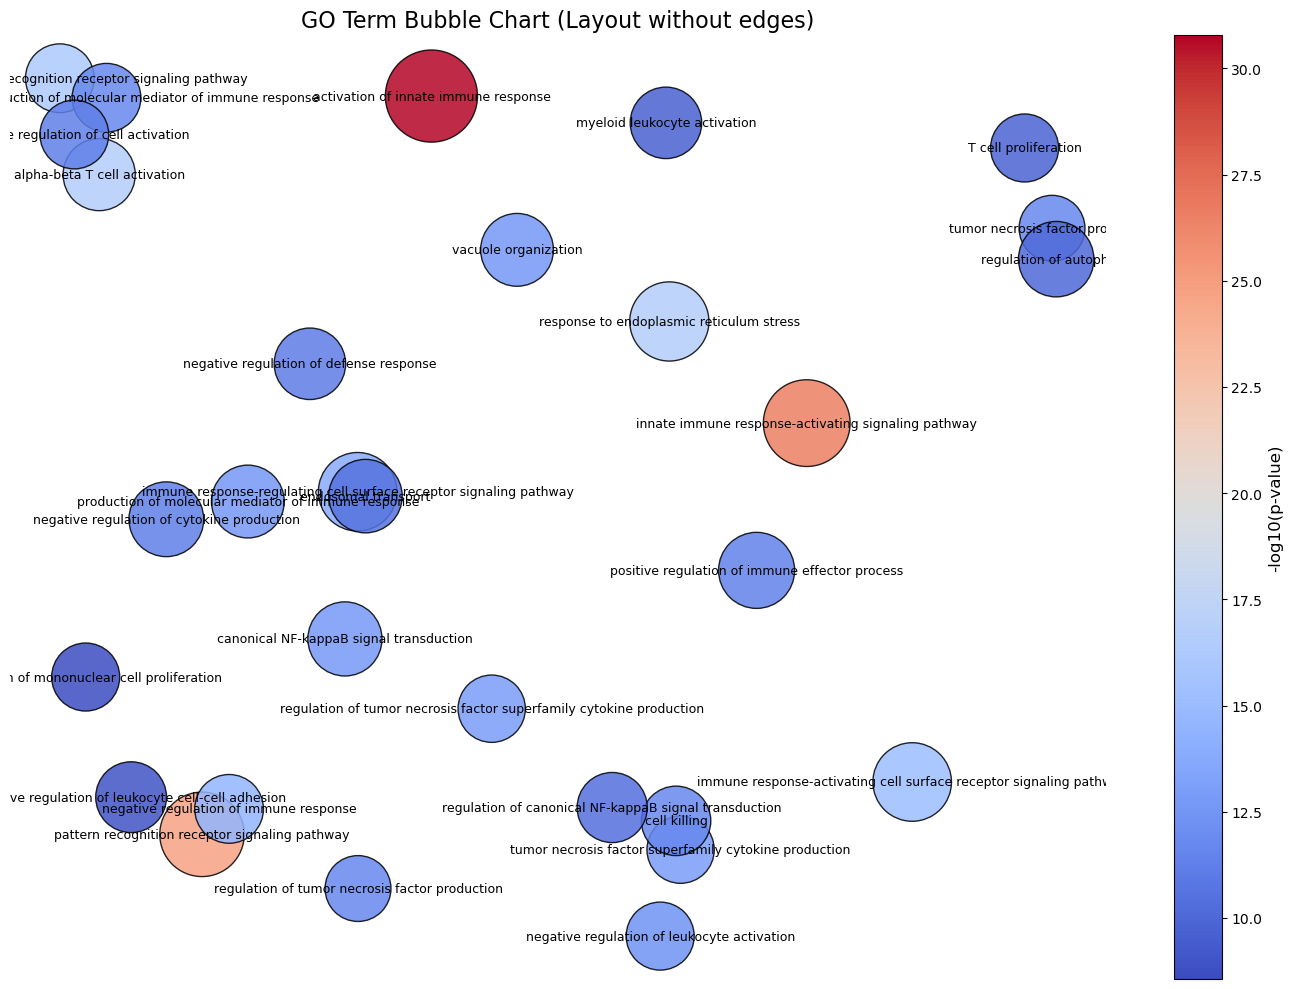

In [51]:
# Use filtered GO terms
go_df = Tact_go_filtered[Tact_go_filtered["significant"]].copy()
go_df = go_df.sort_values("p_value").head(30).copy()
go_df["log_p"] = -np.log10(go_df["p_value"])

# Create a graph with no edges
G = nx.Graph()

for _, row in go_df.iterrows():
    G.add_node(
        row["name"],
        size=row["intersection_size"],
        color=row["log_p"]
    )

# Layout
pos = nx.random_layout(G, seed=42)

# Extract visual attributes
sizes = [G.nodes[n]["size"] * 50 for n in G.nodes]
colors = [G.nodes[n]["color"] for n in G.nodes]

# Setup figure and axis
fig, ax = plt.subplots(figsize=(14, 10))

# Plot nodes
nodes = nx.draw_networkx_nodes(
    G, pos, ax=ax,
    node_size=sizes,
    node_color=colors,
    cmap="coolwarm",
    alpha=0.85,
    edgecolors="black"
)
nx.draw_networkx_labels(G, pos, ax=ax, font_size=9)

# Colorbar
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("-log10(p-value)", fontsize=12)

# Final touches
ax.set_title("GO Term Bubble Chart (Layout without edges)", fontsize=16)
ax.axis("off")
plt.tight_layout()
plt.show()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

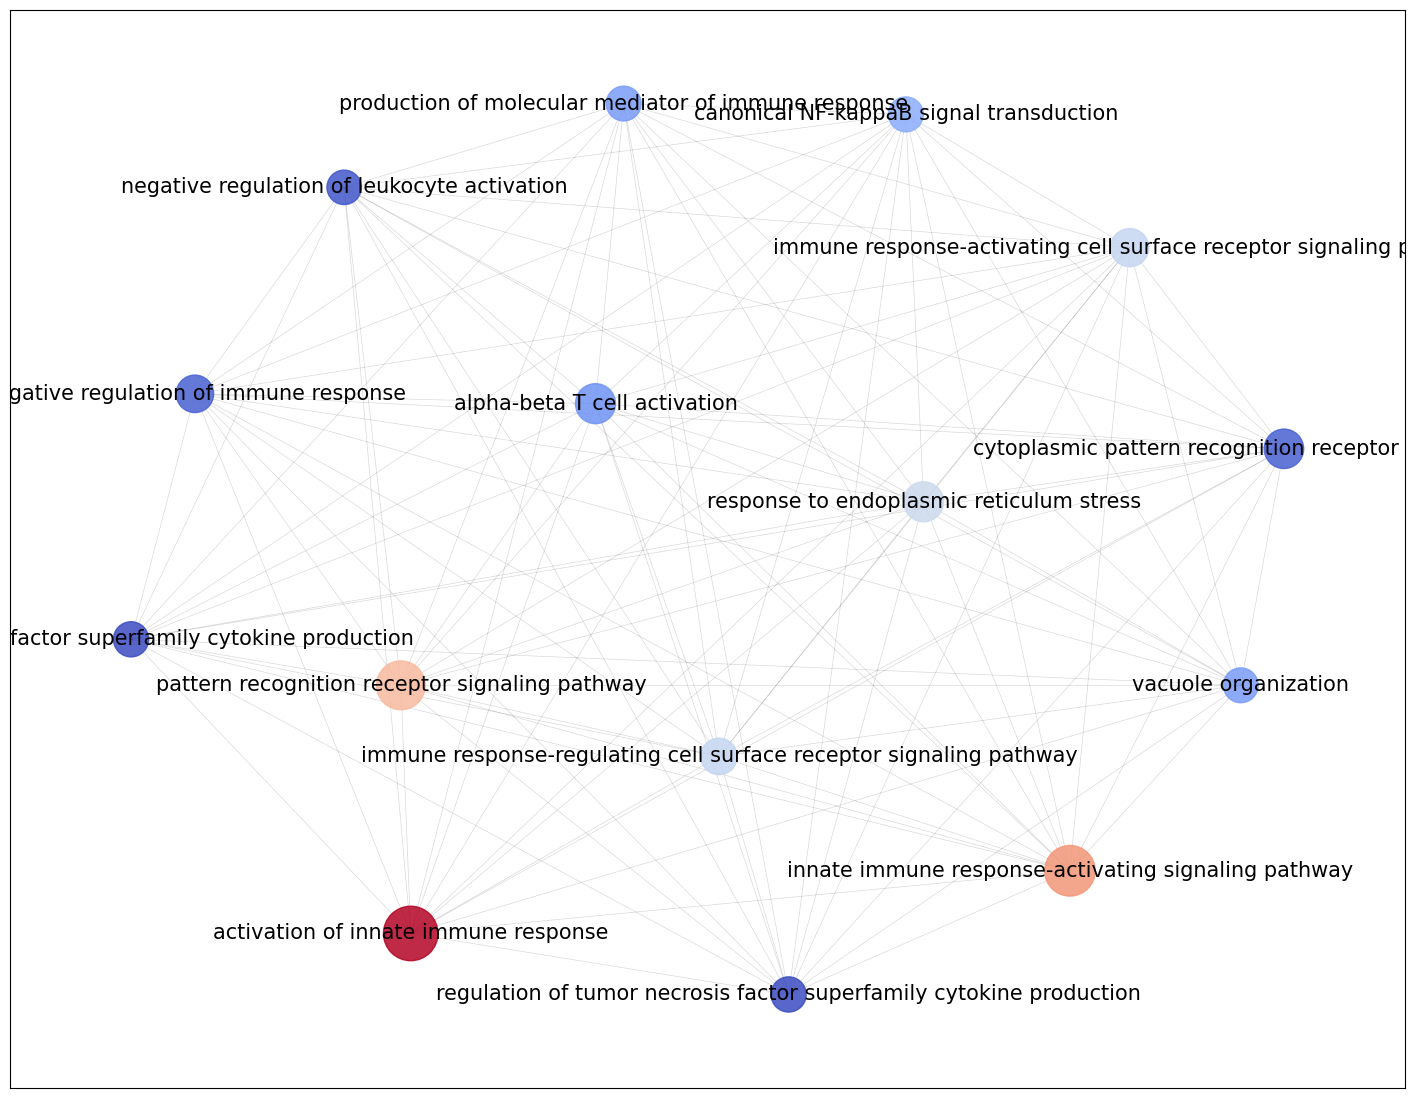

In [52]:
import networkx as nx

# Filter significant terms (you can adjust threshold)
go_results_filtered = Tact_go_filtered[Tact_go_filtered['significant'] == True].copy()

# Limit number of terms for clarity
go_results_filtered = go_results_filtered.sort_values('p_value').head(15)

# Compute -log10(p_value)
go_results_filtered['log_p'] = -np.log10(go_results_filtered['p_value'])

# Create graph
G = nx.Graph()
for _, row in go_results_filtered.iterrows():
    G.add_node(row['name'],  # Use descriptive name
               log_p=row['log_p'], 
               size=row['intersection_size'])

# Add simple full connectivity (for readability, this can be adjusted further if needed)
terms = go_results_filtered['name'].tolist()
for i in range(len(terms)):
    for j in range(i + 1, len(terms)):
        G.add_edge(terms[i], terms[j])

# Layout with increased spacing
pos = nx.spring_layout(G, seed=40, k=2)

# Node sizes/colors
sizes = [G.nodes[n]['log_p'] * 50 for n in G.nodes]
colors = [G.nodes[n]['size'] for n in G.nodes]

# Plot
plt.figure(figsize=(18, 14))
nodes = nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=colors, cmap='coolwarm', alpha=0.85)
edges = nx.draw_networkx_edges(G, pos, alpha=0.15, width=0.5)
labels = nx.draw_networkx_labels(G, pos, font_size=15)

# Colorbar
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=min(colors), vmax=max(colors)))
sm._A = []
plt.colorbar(sm, label='Intersection Size')

plt.title('GO Term Network (Improved Readability)')
plt.axis('off')
plt.tight_layout()
plt.show()



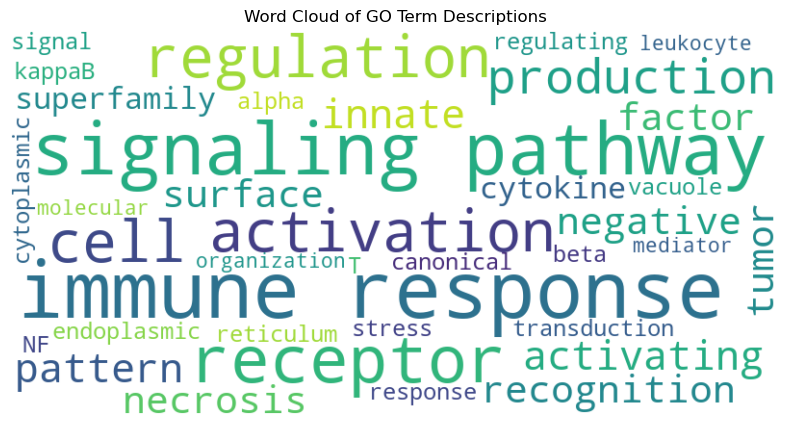

In [44]:
from wordcloud import WordCloud

text = ' '.join(go_results_filtered["name"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of GO Term Descriptions")
plt.show()

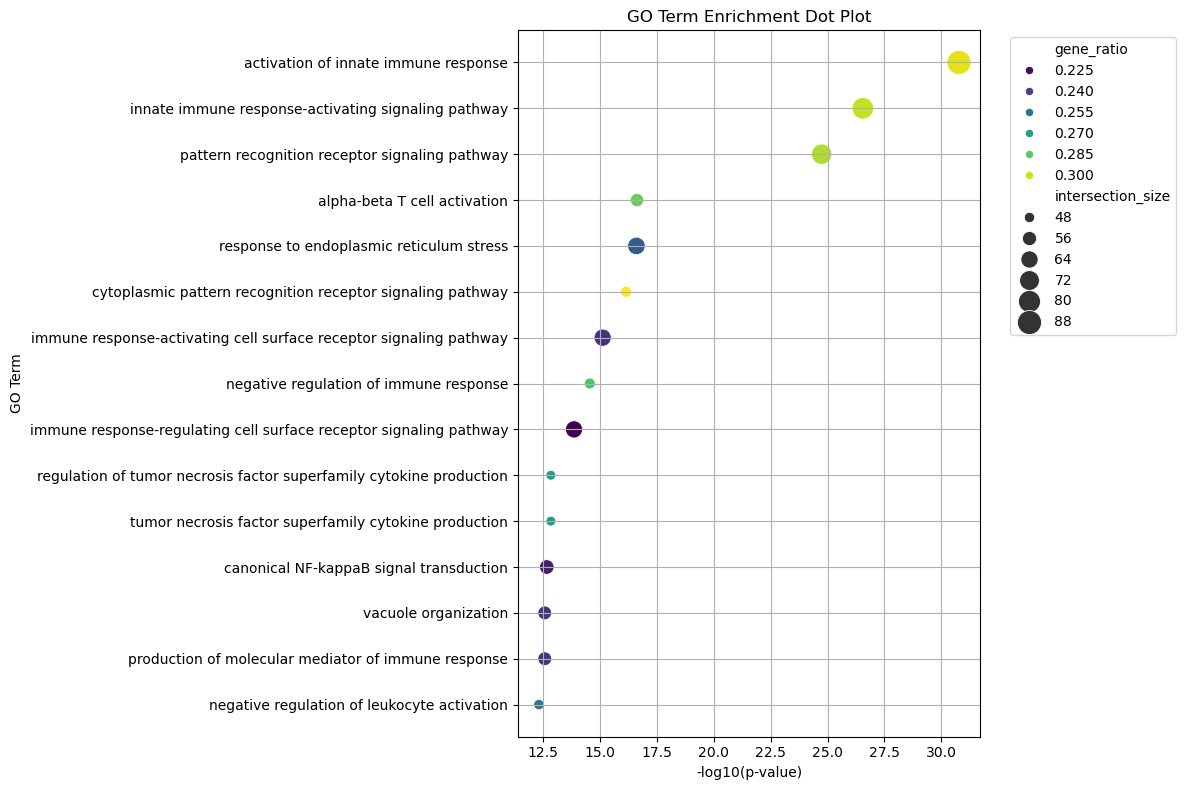

In [46]:
# Compute enrichment ratio and -log10(p-value)
go_results_filtered['gene_ratio'] = go_results_filtered['intersection_size'] / go_results_filtered['term_size']
go_results_filtered['log_p'] = -np.log10(go_results_filtered['p_value'])

# Limit number of terms for readability
top_terms = go_results_filtered.sort_values('p_value').head(30)

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=top_terms,
    x='log_p',
    y='name',
    size='intersection_size',
    hue='gene_ratio',
    palette='viridis',
    sizes=(50, 300),
    legend='brief'
)

plt.xlabel('-log10(p-value)')
plt.ylabel('GO Term')
plt.title('GO Term Enrichment Dot Plot')
plt.grid(True)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()